In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt
from environments.MutilRoadEnv import RouteEnv
from environments.ObsWrapper import FullRGBImgPartialObsWrapper
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
from ray.tune.registry import register_env
# gym.register(
#     id='MiniGrid-RandomPath-v0',
#     entry_point='environments.MutilRoadEnv:RouteEnv'
# )

In [4]:
_ = gym.make("MiniGrid-Empty-8x8-v0", render_mode="rgb_array")

In [5]:
_env_config = {
        "size": 20,
        "roads": (5, 7),
        "max_steps": 200,
        "battery":100,
        "render_mode": "human",
        "agent_pov": False
    }

In [11]:
# Build env
def env_creator(env_config):
    # env = gym.make("MiniGrid-Empty-5x5-v0", render_mode="rgb_array")
    env = RouteEnv(**env_config)
    env = FullRGBImgPartialObsWrapper(env, tile_size=5)
    # env = RGBImgPartialObsWrapper(env, tile_size=10)
    # env = TimeLimit(env, max_episode_steps=1000)
    return ImgObsWrapper(env)

register_env("RandomPath", env_creator)

env = env_creator(_env_config)
# env = env_creator(_env_config)
obs, _ = env.reset()
step = env.step(1)
print(env.action_space, env.observation_space)

Discrete(3) Box(0, 255, (100, 100, 3), uint8)


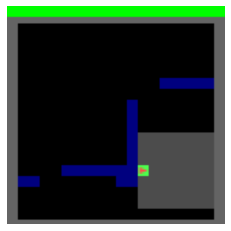

In [12]:
import matplotlib.pyplot as plt

obs, _ = env.reset()
# 使用matplotlib展示图像
plt.imshow(obs)
plt.axis('off')
plt.show()

In [13]:
import random
for i in range(50):
    j = 0
    while True:
        obs, reward, terminated, truncated, info = env.step(random.randint(0, 2))
        j += 1
        if terminated or truncated:
            print(i, j, terminated, truncated)
            if j <= 1:
                raise
            env.reset()
            break

0 103 False True



KeyboardInterrupt



In [14]:
# fig, ax = plt.subplots(dpi=50)
# ax.imshow(obs)
# ax.axis('off')  # Hide axes
# plt.show()

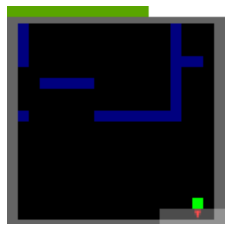

In [16]:
import matplotlib.pyplot as plt

# 使用matplotlib展示图像
plt.imshow(obs)
plt.axis('off')
plt.show()

In [13]:
env.max_steps

200